# Customer Segmentation Analysis - Online Retail

## 1. Project Overview

 This project performs customer segmentation analysis on online retail data to identify distinct customer groups based on 
their purchasing behavior using RFM (Recency, Frequency, Monetary) analysis.

**Objectives:**
    - Segment customers based on purchasing behavior
    - Identify high-value customer groups
    - Provide actionable business recommendations

**Dataset:** Online Retail dataset (Dec 2010 - Dec 2011)

**Source:** [Kaggle - Online Retail Customer Clustering](https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering)

**Description:** Transnational dataset containing all transactions for a UK-based online retail company specializing in unique all-occasion gifts, with many wholesale customers.

**Business Goal:** Build RFM clustering to identify the best customer segments for targeted marketing strategies.

## 2. Setup

### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### 2.2 Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('OnlineRetail.csv', encoding = 'latin-1')

In [3]:
# Basic dataset information
print("=== DATASET OVERVIEW === \n")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Unique customers: {df['CustomerID'].nunique()}")


print("\n=== SAMPLE DATA ===")
# Display first few rows
df.head()

=== DATASET OVERVIEW === 

Dataset shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Unique customers: 4372

=== SAMPLE DATA ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## 3. Exploratory Data Analysis

### 3.1 Dataset Structure

In [4]:
# Detailed dataset information
print("=== DATASET STRUCTURE ===\n")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n=== DATA TYPES & MISSING VALUES ===\n")
# Data types and missing values
df.info()

=== DATASET STRUCTURE ===

Total records: 541,909
Total columns: 8
Memory usage: 194.3 MB

=== DATA TYPES & MISSING VALUES ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 3.2 Missing Values Analysis

In [5]:
# Check missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_summary

=== MISSING VALUES ANALYSIS ===


,Missing Count,Missing Percentage
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


### 3.3 Date Range Analysis

In [6]:
# Convert and analyze dates
print("=== DATE RANGE ANALYSIS ===\n")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Convert InvoiceDate to datetime
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Analysis period: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")
print(f"New data type: {df['InvoiceDate'].dtype}")

=== DATE RANGE ANALYSIS ===

Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Analysis period: 373 days
New data type: datetime64[ns]


### 3.4 Numerical Data Analysis

In [7]:
# Analyze numerical columns
print('=== NUMERICAL DATA ANALYSIS ===')

# Basic statistics for numerical columns
numerical_cols = ['Quantity', 'UnitPrice']
df[numerical_cols].describe()

=== NUMERICAL DATA ANALYSIS ===


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [8]:
# Check for negative values and zeros
print(f"Negative quantities : {(df['Quantity'] < 0).sum():,}")
print(f"Zero quantities : {(df['Quantity'] == 0).sum():,}")
print(f"Negative prices : {(df['UnitPrice'] < 0).sum():,}")
print(f"Zero prices : {(df['UnitPrice'] == 0).sum():,}")

Negative quantities : 10,624
Zero quantities : 0
Negative prices : 2
Zero prices : 2,515


In [9]:
# Example for a negative quantity 
if (df['Quantity'] < 0).sum() > 0:
    print(f"\nSample negative quantities (returns):")
(df[df['Quantity'] < 0][['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']].head(3))


Sample negative quantities (returns):


,InvoiceNo,StockCode,Description,Quantity,UnitPrice
141,C536379,D,Discount,-1,27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65


## 4. Data Cleaning

### 4.1 Remove Missing CustomerIDs

In [10]:
# Remove transactions without CustomerID 
print('=== REMOVING MISSING CUSTOMERIDs ===\n')
print(f"Before cleaning : {len(df):,} rows")

df_clean = df.dropna(subset = ['CustomerID']).copy()

print(f"After cleaning : {len(df_clean):,} rows")
print(f"Rows removed : {len(df) - len(df_clean) :,}")
print(f"Unique customers remaining : {(df_clean['CustomerID']).nunique():,}")

=== REMOVING MISSING CUSTOMERIDs ===

Before cleaning : 541,909 rows
After cleaning : 406,829 rows
Rows removed : 135,080
Unique customers remaining : 4,372


### 4.2 Remove Zero Prices

In [11]:
# Remove transactions with zero prices 
print('=== REMOVING ZERO PRICES ===\n')
print(f"Before removing zero prices : {len(df_clean):,} rows")
print(f"Zero price transactions : {(df_clean['UnitPrice'] == 0).sum():,}")

df_clean = df_clean[df_clean['UnitPrice'] > 0]

print(f"After removing zero prices : {len(df_clean):,} rows")
print(f"Unique customers : {df_clean['CustomerID'].nunique():,}")

=== REMOVING ZERO PRICES ===

Before removing zero prices : 406,829 rows
Zero price transactions : 40
After removing zero prices : 406,789 rows
Unique customers : 4,371


### 4.3 Check for Duplicate Transactions

In [12]:
# Check for duplicate transactions
print('=== CHECKING FOR DUPLICATE TRANSACTIONS ===')

# Check for exact duplicates
exact_duplicates = df_clean.duplicated().sum()
print(f"Exact Duplicates : {exact_duplicates:,}")

# Check for potential duplicate transactions (same customer, product, date, quantity, price)
potential_duplicates = df_clean.duplicated(subset = ['CustomerID', 'StockCode', 'InvoiceDate', 'Quantity', 'UnitPrice']).sum()
print(f"Potential Duplicates : {potential_duplicates:,}")

=== CHECKING FOR DUPLICATE TRANSACTIONS ===
Exact Duplicates : 5,225
Potential Duplicates : 5,267


In [13]:
# Removing exact duplicates
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates : {len(df_clean):,} rows")
print(f"Unique customers : {df_clean['CustomerID'].nunique():,}")

After removing duplicates : 401,564 rows
Unique customers : 4,371


## 5. Feature Engineering

### 5.1 Create Transaction Amount Column

In [14]:
# Calculate total amount for each transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

#Print first few rows
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Count of Positive and Negative Amounts
print(f"Posititve amount (purchases) : {(df_clean['TotalAmount'] > 0).sum():,}")
print(f"Negative amount (purchases) : {(df_clean['TotalAmount'] < 0).sum():,}")

Posititve amount (purchases) : 392,692
Negative amount (purchases) : 8,872


### 5.2 Remove Unprofitable Customers

In [16]:
# Calculate net spending per customer
customer_net_spending = df_clean.groupby('CustomerID')['TotalAmount'].sum()
customer_net_spending

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2045.53
18287.0    1837.28
Name: TotalAmount, Length: 4371, dtype: float64

In [17]:
# Find customers with non-positive spending
unprofitable_customers = customer_net_spending[customer_net_spending <= 0].index
print(f"Unprofitable customers : {len(unprofitable_customers)}")

Unprofitable customers : 49


In [18]:
# Remove unprofitable customers
df_clean = df_clean[~df_clean['CustomerID'].isin(unprofitable_customers)]
print(f"Remaining Transactions : {len(df_clean):,}")
print(f"Unique customers : {df_clean['CustomerID'].nunique():,}")

Remaining Transactions : 401,262
Unique customers : 4,322


## 6. RFM Analysis

### 6.1 Calculate RFM Metrics

In [19]:
# Set analysis date (day after the last transaction)
analysis_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days = 1)
print('Analysis date :', analysis_date)

Analysis date : 2011-12-10 12:50:00


In [20]:
# Calculate RFM for each customer
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (analysis_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalAmount' : 'sum'
}).round(2)

In [21]:
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
12352.0,36,11,1545.41


In [22]:
# Check for customers with zero spending
zero_customers = rfm[rfm['Monetary'] == 0.0]
print(f"Customers with exactly £0.00: {len(zero_customers)}")

if len(zero_customers) > 0:
    print(f"Removing {len(zero_customers)} customers with zero spending...")
    rfm = rfm[rfm['Monetary'] > 0].copy()
    print(f"Remaining customers: {len(rfm):,}")

Customers with exactly £0.00: 5
Removing 5 customers with zero spending...
Remaining customers: 4,317


In [23]:
# RFM statistics
rfm.describe()

,Recency,Frequency,Monetary
count,4317.000000,4317.000000,4317.000000
mean,90.370628,5.118601,1920.720074
std,99.157796,9.382156,8267.016057
min,1.000000,1.000000,2.900000
25%,17.000000,1.000000,301.030000
50%,49.000000,3.000000,653.750000
75%,138.000000,6.000000,1624.210000
max,374.000000,248.000000,279489.020000


### 6.2 Top Customer Analysis

In [24]:
# Most recent customers
print('Most Recent Customers')
(rfm.nsmallest(5, 'Recency')[['Recency', 'Frequency', 'Monetary']])

Most Recent Customers


,Recency,Frequency,Monetary
CustomerID,,,
12423.0,1,9,1849.11
12433.0,1,7,13375.87
12476.0,1,20,6546.58
12518.0,1,5,2056.89
12526.0,1,3,1316.66


In [25]:
# Most Frequent Customers
print('Most Frequent Customers')
(rfm.nlargest(5, 'Frequency')[['Recency', 'Frequency', 'Monetary']])

Most Frequent Customers


,Recency,Frequency,Monetary
CustomerID,,,
14911.0,1,248,132458.73
12748.0,1,223,28405.56
17841.0,2,169,39869.05
14606.0,1,128,11633.35
13089.0,3,118,57322.13


### 6.3 Additional Customer Metrics

In [26]:
# Calculate additional customer metrics
customer_metrics = df_clean.groupby('CustomerID').agg({
    'TotalAmount' : ['sum', 'mean'],
    'Quantity' : 'sum',
    'InvoiceDate' : ['min', 'max'],
    'InvoiceNo' : 'nunique'
}).round(2)

In [27]:
# Rename columns
customer_metrics.columns = ['TotalSpent', 'Ave_Transaction_value', 'TotalQuantity', 'First_Purchase', 'Last_Purchase', 'Uniqueorders']
customer_metrics.head()

,TotalSpent,Ave_Transaction_value,TotalQuantity,First_Purchase,Last_Purchase,Uniqueorders
CustomerID,,,,,,
12347.0,4310.00,23.68,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,7
12348.0,1797.24,57.98,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,4
12349.0,1757.55,24.08,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1
12350.0,334.40,19.67,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1
12352.0,1545.41,16.27,470,2011-02-16 12:33:00,2011-11-03 14:37:00,11


In [28]:
# Calculate date range (days between first and last purchase)
customer_metrics['PurchaseDateRange'] = (
    customer_metrics['Last_Purchase'] - customer_metrics['First_Purchase']
).dt.days

# Calculate Average Order Value (per order)
order_totals = df_clean.groupby(['CustomerID', 'InvoiceNo'])['TotalAmount'].sum()
customer_aov = order_totals.groupby('CustomerID').mean().round(2)
customer_metrics['Avg_Order_Values'] = customer_aov

customer_metrics.head()

,TotalSpent,Ave_Transaction_value,TotalQuantity,First_Purchase,Last_Purchase,Uniqueorders,PurchaseDateRange,Avg_Order_Values
CustomerID,,,,,,,,
12347.0,4310.00,23.68,2458,2010-12-07 14:57:00,2011-12-07 15:52:00,7,365,615.71
12348.0,1797.24,57.98,2341,2010-12-16 19:09:00,2011-09-25 13:13:00,4,282,449.31
12349.0,1757.55,24.08,631,2011-11-21 09:51:00,2011-11-21 09:51:00,1,0,1757.55
12350.0,334.40,19.67,197,2011-02-02 16:01:00,2011-02-02 16:01:00,1,0,334.40
12352.0,1545.41,16.27,470,2011-02-16 12:33:00,2011-11-03 14:37:00,11,260,140.49


In [29]:
print('1. Average Order Value : ')
print(f"\t Overall AOV : £ {customer_aov.mean():.2f}")
print(f"\t AOV range : £ {customer_aov.min():.2f} - £ {customer_aov.max():.2f}")

print(f"\n2. Total Quantity Purchased :")
print(f"\t Average per customer: {customer_metrics['TotalQuantity'].mean():.0f} items")
print(f"\t Range: {customer_metrics['TotalQuantity'].min():.0f} - {customer_metrics['TotalQuantity'].max():.0f} items")

print(f"\n3. Purchase Date Range :")
print(f"\t Average customer lifespan: {customer_metrics['PurchaseDateRange'].mean():.0f} days")
print(f"\t Range: {customer_metrics['PurchaseDateRange'].min():.0f} - {customer_metrics['PurchaseDateRange'].max():.0f} days")

1. Average Order Value : 
	 Overall AOV : £ 320.77
	 AOV range : £ 0.00 - £ 6207.67

2. Total Quantity Purchased :
	 Average per customer: 1129 items
	 Range: 0 - 196143 items

3. Purchase Date Range :
	 Average customer lifespan: 135 days
	 Range: 0 - 373 days


## 7. Customer Segmentation

### 7.1 Determine Optimal Number of Clusters

In [30]:
# Prepare data for clustering (normalize the RFM values)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [31]:
# Test different numbers of clusters
inertias = []
silhouette_scores = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, cluster_labels))

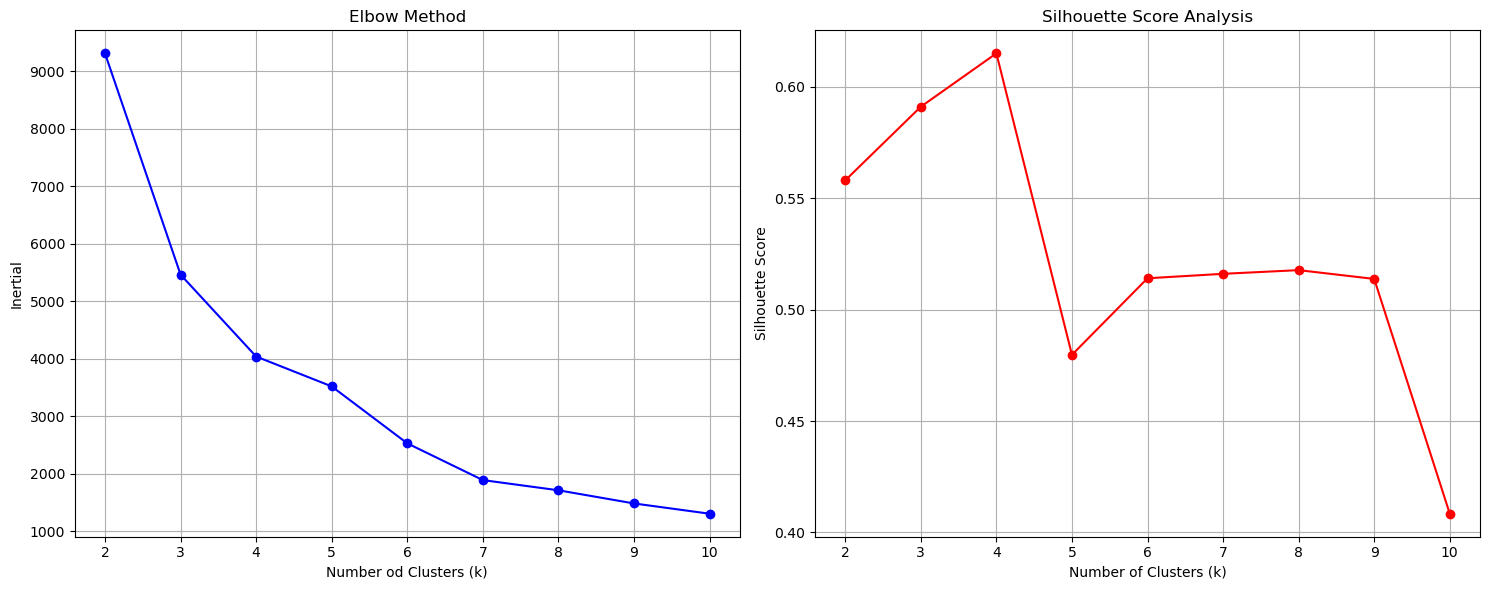

In [32]:
# Plot both methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))

#Elbow method
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number od Clusters (k)')
ax1.set_ylabel('Inertial')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Silhouette score
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [33]:
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"{k}\t{inertia:.2f}\t\t{silhouette:.4f}")

print(f"\nOptimal number of clusters based on:")
print(f"• Highest Silhouette Score: k={k_range[silhouette_scores.index(max(silhouette_scores))]} (score: {max(silhouette_scores):.4f})")

2	9311.92		0.5580
3	5463.56		0.5911
4	4039.92		0.6151
5	3520.21		0.4797
6	2530.28		0.5141
7	1890.94		0.5161
8	1713.65		0.5177
9	1484.87		0.5138
10	1306.38		0.4084

Optimal number of clusters based on:
• Highest Silhouette Score: k=4 (score: 0.6151)


### 7.2 Apply K-Means Clustering

In [34]:
# Based on the analysis:
# Elbow method: Shows elbow around k=4
# Silhouette score: Highest at k=4 (0.62)
optimal_clusters = 4

# Apply K-means with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,2,7,4310.00,3
12348.0,75,4,1797.24,3
12349.0,19,1,1757.55,3
12350.0,310,1,334.40,1
12352.0,36,11,1545.41,3


In [35]:
# Show cluster sizes
cluster_sizes = rfm['Cluster'].value_counts().sort_index()
for i in range(optimal_clusters):
    print(f"  Cluster {i}: {cluster_sizes[i]:,} customers ({cluster_sizes[i]/len(rfm)*100:.1f}%)")

  Cluster 0: 193 customers (4.5%)
  Cluster 1: 1,054 customers (24.4%)
  Cluster 2: 11 customers (0.3%)
  Cluster 3: 3,059 customers (70.9%)


In [36]:
# Show cluster characteristics
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean'
}).round(2)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,10.79,28.58,12190.96
1,245.64,1.85,488.70
2,5.09,109.73,124150.43
3,42.20,4.39,1326.62


## 8. Segment Analysis & Visualization

### 8.1 Customer Segment Profiles

In [37]:
# Analyze and name customer segments based on RFM characteristics
segment_names = {
    0: "High Value Customers",
    1: "At-Rist/Lost Customers",
    2: "VIP Customers", 
    3: "Regular Customers"
}

In [38]:
# Cluster Profiling
for cluster in range(4):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    size = len(cluster_data)
    percentage = (size / len(rfm) * 100)
    
    print(f"\nCLUSTER {cluster}: {segment_names[cluster]}")
    print(f"   Size: {size:,} customers ({percentage:.1f}%)")
    print(f"   Recency: {cluster_data['Recency'].mean():.0f} days (last purchase)")
    print(f"   Frequency: {cluster_data['Frequency'].mean():.1f} transactions")
    print(f"   Monetary: £{cluster_data['Monetary'].mean():.2f} average spending")


CLUSTER 0: High Value Customers
   Size: 193 customers (4.5%)
   Recency: 11 days (last purchase)
   Frequency: 28.6 transactions
   Monetary: £12190.96 average spending

CLUSTER 1: At-Rist/Lost Customers
   Size: 1,054 customers (24.4%)
   Recency: 246 days (last purchase)
   Frequency: 1.9 transactions
   Monetary: £488.70 average spending

CLUSTER 2: VIP Customers
   Size: 11 customers (0.3%)
   Recency: 5 days (last purchase)
   Frequency: 109.7 transactions
   Monetary: £124150.43 average spending

CLUSTER 3: Regular Customers
   Size: 3,059 customers (70.9%)
   Recency: 42 days (last purchase)
   Frequency: 4.4 transactions
   Monetary: £1326.62 average spending


### 8.2 Segment Visualization

#### 8.2.1 Recency vs Montary Analysis

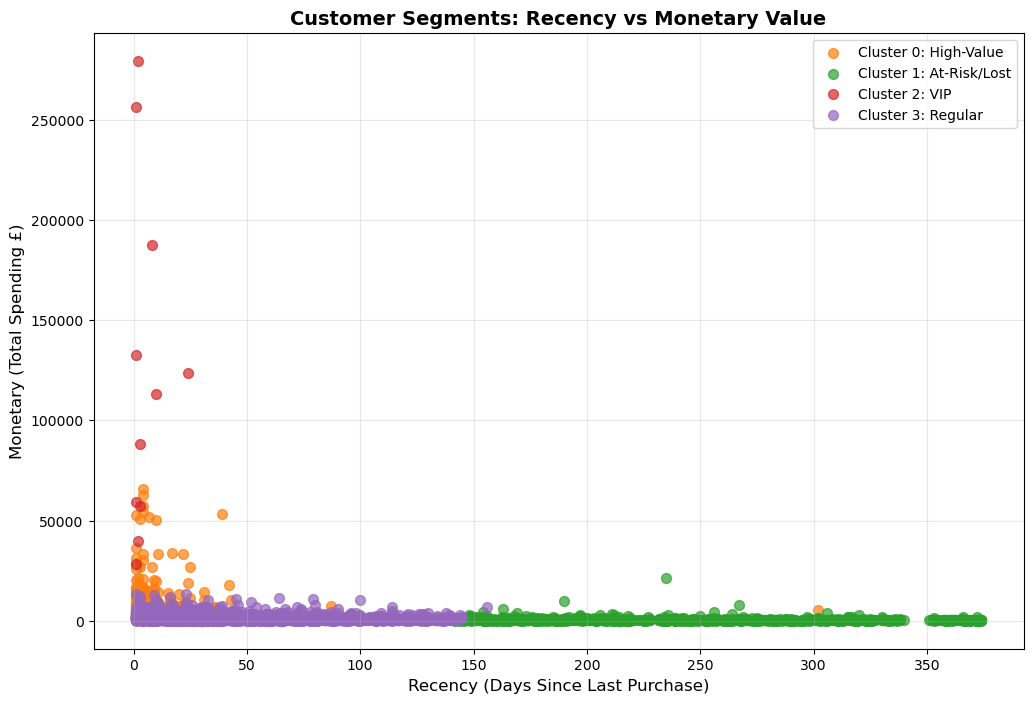

In [39]:
# 1. Recency vs Monetary visualization
plt.figure(figsize=(12, 8))

colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
segment_names_short = ['High-Value', 'At-Risk/Lost', 'VIP', 'Regular']

for i in range(4):
    cluster_data = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster_data['Recency'], cluster_data['Monetary'], 
               c=colors[i], label=f'Cluster {i}: {segment_names_short[i]}', 
               alpha=0.7, s=50)

plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Monetary (Total Spending £)', fontsize=12)
plt.title('Customer Segments: Recency vs Monetary Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
cluster_3_high_recency = rfm[(rfm['Cluster'] == 0) & (rfm['Recency'] > 250)]
cluster_3_high_recency

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
17850.0,302,35,5303.48,0


**Interpretation of the graph:**

This customer segmentation graph shows four distinct groups in order of priority: 

Cluster 2 (Red) - VIP customers are the most valuable, making recent purchases (0-30 days) with enormous spending (up to £275,000+)


Cluster 0 (Orange) - High-Value customers are recent purchasers (0-50 days) with solid high spending (£10k-£70k range) and represent excellent growth opportunities


Cluster 3 (Purple) - Regular customers have purchased recently (0-150 days) with low to moderate spending (under £15k) and form the stable customer base


Cluster 1 (Green) - At-Risk/Lost customers haven't purchased in months (150-400+ days) with minimal spending and need immediate reactivation efforts.


However, there's an exceptional case of Customer ID 17850 from the orange cluster (High-Value) who hasn't purchased in 302 days but has high frequency (35 transactions) and significant monetary value (£5,303.48), suggesting this is a previously loyal, valuable customer who may have temporarily stopped purchasing but retains high potential.

#### 8.2.2 Frequency vs Monetary Analysis

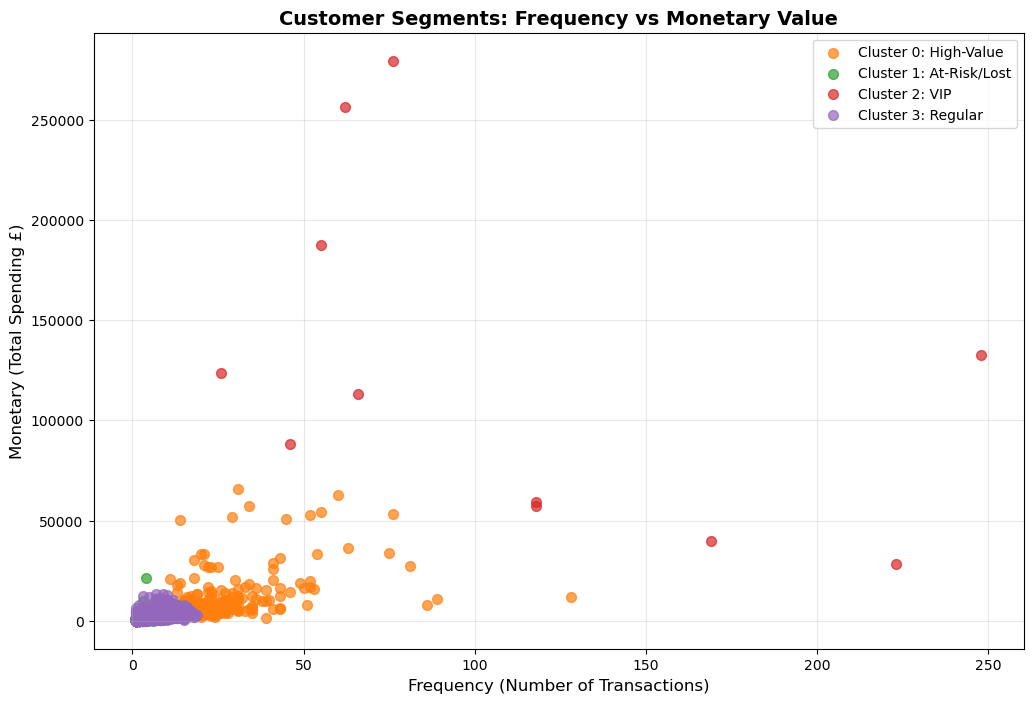

In [41]:
# 2. Frequency vs Monetary visualization
plt.figure(figsize=(12, 8))

for i in range(4):
    cluster_data = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster_data['Frequency'], cluster_data['Monetary'], 
               c=colors[i], label=f'Cluster {i}: {segment_names_short[i]}', 
               alpha=0.7, s=50)

plt.xlabel('Frequency (Number of Transactions)', fontsize=12)
plt.ylabel('Monetary (Total Spending £)', fontsize=12)
plt.title('Customer Segments: Frequency vs Monetary Value', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation of the graph:**


This customer segmentation graph shows four distinct groups based on purchase frequency and spending


Cluster 2 (Red) - VIP customers are the most valuable, containing customers who shop very frequently (50-250+ transactions) and spend enormous amounts (up to £275,000+)


Cluster 0 (Orange) - High-Value customers shop regularly (10-80 transactions) with high spending (£10k-£70k) and are good targets for VIP upgrade programs


Cluster 3 (Purple) - Regular customers represent typical customers who shop occasionally (1-20 transactions) with low spending and form the stable base


Cluster 1 (Green) - At-Risk/Lost customers have minimal activity (1-5 transactions) with very low spending and need immediate attention.

#### 8.2.3 Recency vs Frequency Analysis

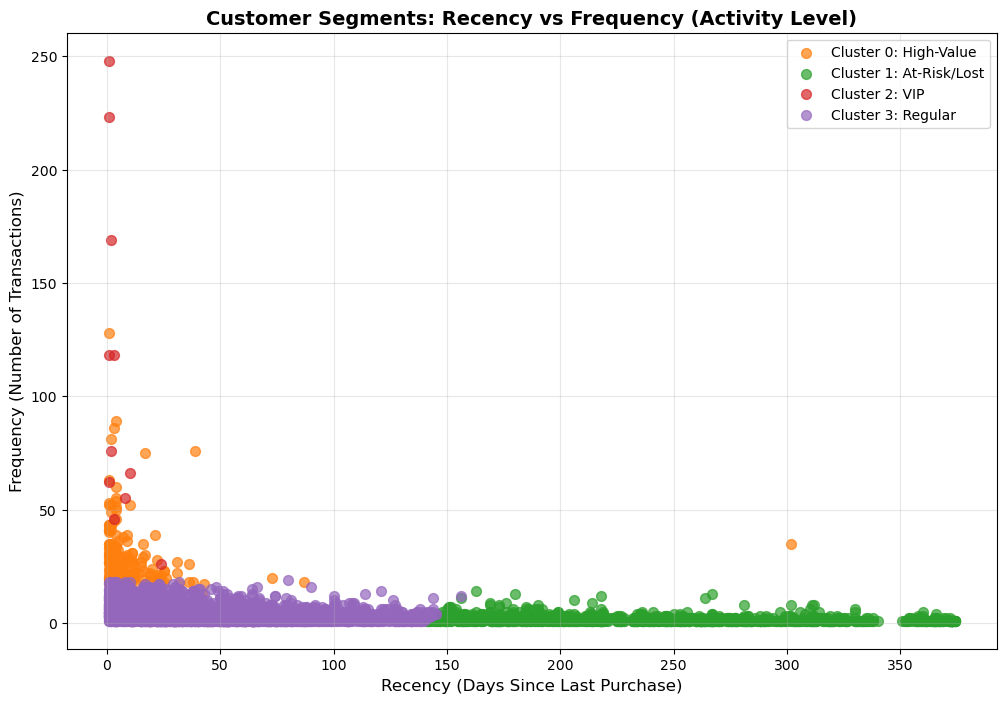

In [42]:
# 3. Recency vs Frequency visualization
plt.figure(figsize=(12, 8))

for i in range(4):
    cluster_data = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], 
               c=colors[i], label=f'Cluster {i}: {segment_names_short[i]}', 
               alpha=0.7, s=50)

plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Frequency (Number of Transactions)', fontsize=12)
plt.title('Customer Segments: Recency vs Frequency (Activity Level)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation of the graph:**


This customer segmentation graph shows four distinct groups in order of priority:


Cluster 2 (Red) - VIP customers are the most valuable, making recent purchases (0-20 days) with extremely high transaction frequency (up to 250 transactions), representing the most active and engaged customers


Cluster 0 (Orange) - High-Value customers are recent purchasers (0-50 days) with moderate to high frequency (20-130 transactions) and represent excellent growth opportunities


Cluster 3 (Purple) - Regular customers have purchased recently (0-100 days) with low frequency (1-20 transactions) and form the stable customer base


Cluster 1 (Green) - At-Risk/Lost customers haven't purchased in months (150-400+ days) with minimal frequency and need immediate reactivation efforts.


However, there's an exceptional case of an orange High-Value customer at 300 days recency with 35 transactions, suggesting a previously very active customer who has become dormant but retains high potential.

#### 8.2.4 Customer Distribution by Segment

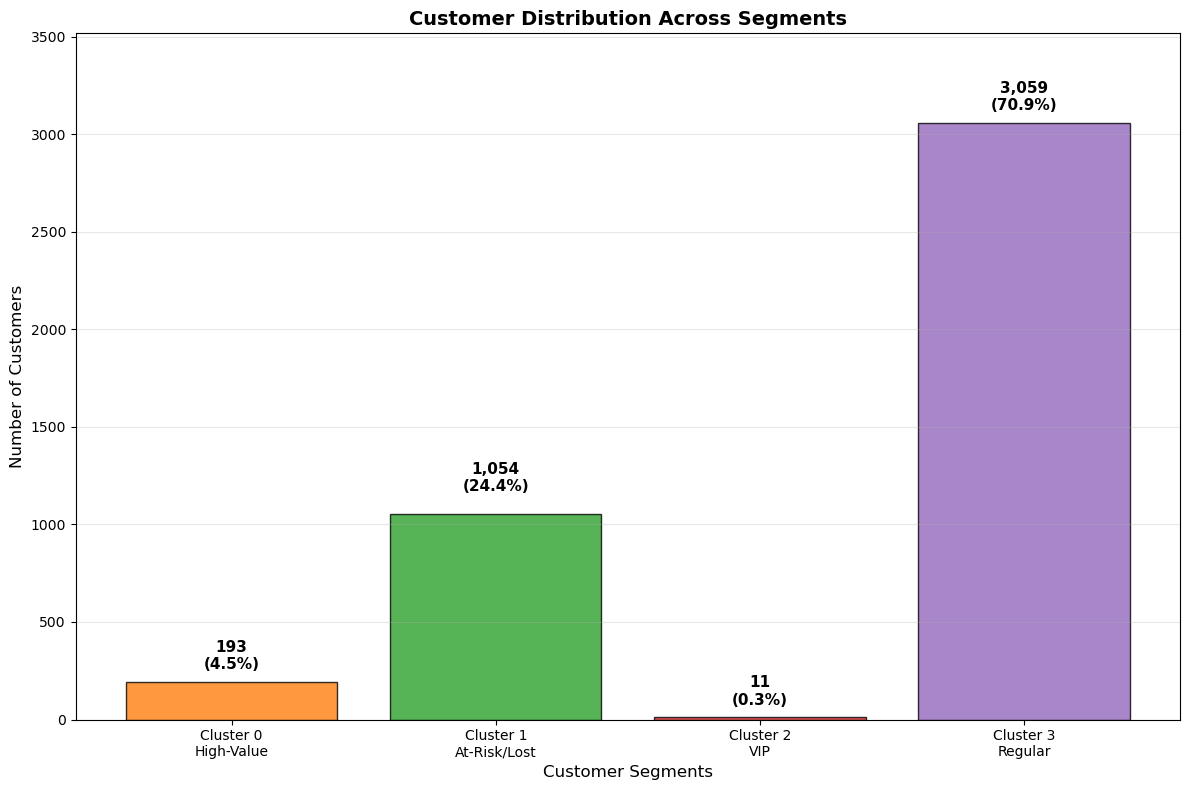

In [43]:
# 4. Cluster sizes bar chart 
plt.figure(figsize=(12, 8))

cluster_counts = rfm['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(rfm) * 100).round(1)

# Create bars with different colors for each cluster
bars = plt.bar(range(len(cluster_counts)), cluster_counts.values, 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels on top of each bar 
for i, (count, percentage) in enumerate(zip(cluster_counts.values, cluster_percentages.values)):
    # Use different positioning for the tallest bar (Cluster 1)
    if i == 1:  # Cluster 1 (tallest bar)
        plt.text(i, count + 100, f'{count:,}\n({percentage}%)', 
                 ha='center', va='bottom', fontweight='bold', fontsize=11)
    else:
        plt.text(i, count + 50, f'{count:,}\n({percentage}%)', 
                 ha='center', va='bottom', fontweight='bold', fontsize=11)

# Customize the chart
plt.xlabel('Customer Segments', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Distribution Across Segments', fontsize=14, fontweight='bold')

# Add cluster names to x-axis
plt.xticks(range(len(cluster_counts)), 
           [f'Cluster {i}\n{segment_names_short[i]}' for i in range(len(cluster_counts))])

plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(cluster_counts.values) * 1.15)  
plt.tight_layout()
plt.show()

**Interpretation of the graph:**

This customer distribution chart reveals the composition of the customer base across segments


Cluster 3 (Purple) - Regular customers dominates with 3,059 customers (70.9%), representing the majority of the customer base with typical low-value, occasional purchasing behavior


Cluster 1 (Green) - At-Risk/Lost customers contains 1,054 customers (24.4%), indicating nearly a quarter of customers are dormant and need reactivation


Cluster 0 (Orange) - High-Value customers has 193 customers (4.5%), representing a small but significant group of frequent, high-spending customers


Cluster 2 (Red) - VIP customers contains only 11 customers (0.3%), but these ultra-high-value customers likely generate disproportionate revenue despite their tiny numbers.

## 9. Business Insights & Recommendations

### 9.1 Executive Summary

In [44]:
total_customers = len(rfm)
total_revenue = df_clean['TotalAmount'].sum()

print(f"\n BUSINESS OVERVIEW:")
print(f"   • Total Customers Analyzed: {total_customers:,}")
print(f"   • Total Revenue: £{total_revenue:,.2f}")
print(f"   • Analysis Period: {(df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days} days")

print(f"\n CUSTOMER PORTFOLIO BREAKDOWN:")
for cluster in range(4):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    cluster_customers = df_clean[df_clean['CustomerID'].isin(cluster_data.index)]
    cluster_revenue = cluster_customers['TotalAmount'].sum()
    revenue_percentage = (cluster_revenue / total_revenue * 100)
    
    segment_names = {
    0: "High Value Customers",
    1: "At-Rist/Lost Customers",
    2: "VIP Customers", 
    3: "Regular Customers"
    }
    
    print(f"   • {segment_names[cluster]}: {len(cluster_data):,} customers ({len(cluster_data)/total_customers*100:.1f}%)")
    print(f"     Revenue Contribution: £{cluster_revenue:,.2f} ({revenue_percentage:.1f}%)")

print(f"\n KEY FINDINGS:")
print(f"   • {rfm[rfm['Cluster']==0].shape[0]:,} customers (24.4%) are at risk of churning")
print(f"   • Only {rfm[rfm['Cluster']==2].shape[0]} customers (0.3%) are VIP Customers but drive significant revenue")
print(f"   • {rfm[rfm['Cluster']==1].shape[0]:,} customers (70.9%) form the core Regular customer base")
print(f"   • Opportunity to upgrade Regular customers to higher-value segments")


 BUSINESS OVERVIEW:
   • Total Customers Analyzed: 4,317
   • Total Revenue: £8,291,748.56
   • Analysis Period: 373 days

 CUSTOMER PORTFOLIO BREAKDOWN:
   • High Value Customers: 193 customers (4.5%)
     Revenue Contribution: £2,352,855.61 (28.4%)
   • At-Rist/Lost Customers: 1,054 customers (24.4%)
     Revenue Contribution: £515,093.45 (6.2%)
   • VIP Customers: 11 customers (0.3%)
     Revenue Contribution: £1,365,654.76 (16.5%)
   • Regular Customers: 3,059 customers (70.9%)
     Revenue Contribution: £4,058,144.74 (48.9%)

 KEY FINDINGS:
   • 193 customers (24.4%) are at risk of churning
   • Only 11 customers (0.3%) are VIP Customers but drive significant revenue
   • 1,054 customers (70.9%) form the core Regular customer base
   • Opportunity to upgrade Regular customers to higher-value segments


### 9.2 Business Recommendations by Segment

**VIP CUSTOMERS (11 customers - 0.3%)**


These customers generate the highest revenue and loyalty.


Recommendations:


• Provide dedicated customer service

• Offer exclusive products and early access

• Regular personal outreach and relationship management

• Premium loyalty rewards and benefits

**HIGH-VALUE CUSTOMERS (193 customers - 4.5%)**


Strong customers with potential to become VIPs.


Recommendations:


• Cross-sell related products to increase order value

• Target for VIP program eligibility

• Send personalized product recommendations

• Re-engage dormant customer 17850 with special offer

**REGULAR CUSTOMERS (3,059 customers (70.9%))**


Core customer base with room for growth.


Recommendations:


• Encourage more frequent purchases through email campaigns

• Offer bundle deals to increase transaction size

• Focus on upgrading top 20% to higher-value segments

• Implement loyalty program to build engagement

**AT-RISK/LOST 1,054 customers (24.4%)**


Customers who may have churned, need immediate attention.


Recommendations:


• Launch win-back campaigns with discount offers

• Survey to understand why they stopped purchasing

• Use retargeting ads to re-engage

• If no response after 60 days, reduce marketing spend

### 9.3 Conclusion & Next Steps

**PROJECT SUMMARY**


This customer segmentation analysis successfully identified four distinct customer groups using RFM methodology, providing clear insights into customer behavior and business opportunities.


**KEY BUSINESS INSIGHTS**


• Customer base is heavily skewed toward Regular customers (71%)

• Small VIP segment (0.3%) likely drives disproportionate revenue

• Significant churn risk with 24% of customers inactive for 8+ months

• Clear upgrade path exists from Regular to Loyal High-Value segments


**IMMEDIATE ACTION ITEMS**


1. Implement VIP retention program within 30 days


2. Launch win-back campaign for At-Risk customers


3. Create loyalty program to upgrade Regular customers


4. Develop targeted re-engagement for dormant high-value customers


**RECOMMENDED FOLLOW-UP ANALYSIS**


• Product affinity analysis to improve cross-selling

• Seasonal purchasing pattern analysis

• Customer lifetime value modeling

• Churn prediction modeling for early intervention


**EXPECTED BUSINESS IMPACT**


• Improved customer retention through targeted strategies

• Increased average order value via segment-specific campaigns

• More efficient marketing spend allocation

• Enhanced customer experience through personalized approaches